In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Summary of Weather.csv',low_memory=False)

In [5]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

<AxesSubplot:>

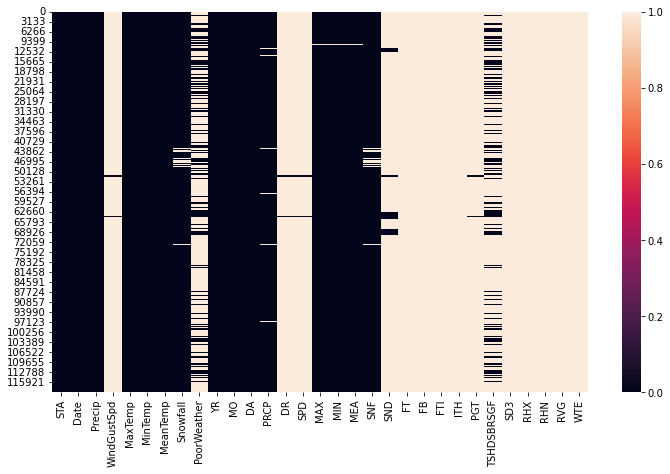

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

Since we can see that few of our columns are completely blank and does not hold any value, we shall remove them. We will keep a threshold that if the column has data missing more than 40%, we are going to remove it.

In [16]:
df['PoorWeather'].isnull().sum()/len(df) > .4

True

In [17]:
dc = []
for clnm in df.columns:
    if df[clnm].isnull().sum()/len(df) > .4:
        dc.append(clnm)
print('The column names with more than 40% null values are : {}'.format(dc))

The column names with more than 40% null values are : ['WindGustSpd', 'PoorWeather', 'DR', 'SPD', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']


In [18]:
df.drop(columns=dc, inplace=True)

<AxesSubplot:>

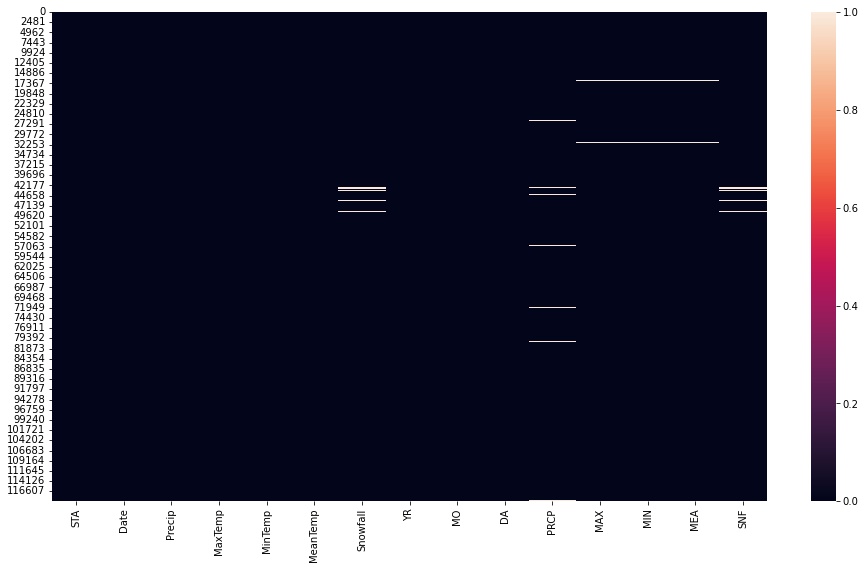

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

Now we see that, our data has less missing values at some points so, we shall fill the missing values or we can also drop these values because our dataset has lot many training examples.

In [20]:
df.columns[df.isnull().sum() > 0]

Index(['Snowfall', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'], dtype='object')

In [21]:
df.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [22]:
for cl in df.columns[df.isnull().sum() > 0]:
    print("The column '{}' has '{}' dtype".format(cl , df[cl].dtype))

The column 'Snowfall' has 'object' dtype
The column 'PRCP' has 'object' dtype
The column 'MAX' has 'float64' dtype
The column 'MIN' has 'float64' dtype
The column 'MEA' has 'float64' dtype
The column 'SNF' has 'object' dtype


In [23]:
for clm in df.columns[df.isnull().sum() > 0]:
    print(df[clm].unique()[:5])

['0' nan '22.86' '33.02' '30.48']
['0.04' '0' '0.1' 'T' '0.14']
[78. 84. 79. 80. 83.]
[72. 71. 73. 70. 68.]
[75. 78. 76. 77. 74.]
['0' nan '0.9' '1.3' '1.2']


So, here we see that our data is given of 'object' type, but actually it can be converted to floating points. It would be easy for us also required as a particular column should not hold object type as well as numerical. So, Lets convert our dtypes to single type.

In [25]:
#While running this code, we get a  error that says that > unable to parse "#value" at position 48609.
#So, I am removing that row,and then we will move further.
for clnm in df.columns[df.isnull().sum() > 0]:
    try:
        df = df[df[clnm].str.contains("#VALUE")==False]
        df = df[df[clnm].str.contains("T")==False]
    except:
        None

In [26]:
for clm in df.columns[df.isnull().sum() > 0]:
    print(df[clm].unique()[:5])

[78. 84. 79. 80. 76.]
[72. 71. 73. 68. 69.]
[75. 78. 76. 74. 72.]


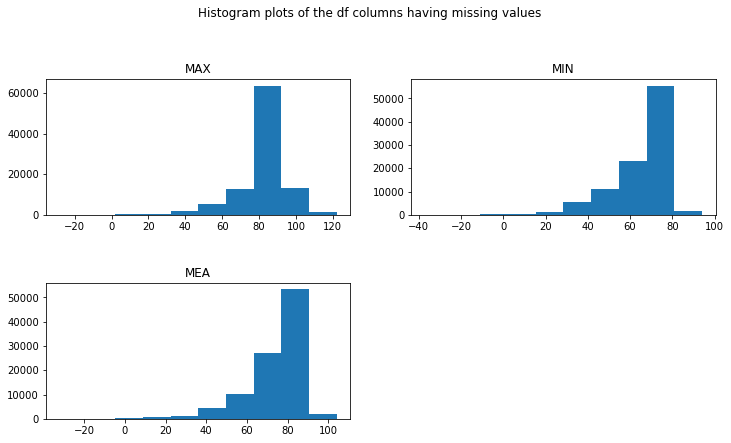

In [15]:
plt.figure(figsize=(12,10))
plt.suptitle('Histogram plots of the df columns having missing values')
plt.subplots_adjust(hspace=0.5)
for i, clm in enumerate(df.columns[df.isnull().sum() > 0]):
    plt.subplot(3,2,i+1)
    plt.hist(df[clm])
    plt.title(clm)

So, in column MAX we will fill null values with Mean whereas in Columns MIN and MEA we will fill these values with Median. But We found that median will be  'nan' value, so we are only fillng the values with mean.

In [31]:
df['MAX'] = df['MAX'].fillna(np.mean(df['MAX']))
df['MIN'] = df['MIN'].fillna(np.mean(df['MIN']))
df['MEA'] = df['MEA'].fillna(np.mean(df['MEA']))

In [32]:
df.index[df.isnull().any(axis=1)] , df[df.isnull().sum(axis=1) > 0]

(Int64Index([], dtype='int64'),
 Empty DataFrame
 Columns: [STA, Date, Precip, MaxTemp, MinTemp, MeanTemp, Snowfall, YR, MO, DA, PRCP, MAX, MIN, MEA, SNF]
 Index: [])

That means there are no rows and no columns with null values in the df.

In [33]:
# plt.figure(figsize=(12,9))
# sns.heatmap(df.isnull())

In [34]:
#Converting our Date column(string) into Date format.
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [35]:
for cl in df.columns:
    if cl != 'Date':
        df[cl] = pd.to_numeric(df[cl])


Now we have done some good analysis of data, handled the missing values and also converted our data to numeric form, so that some statistical anaylsis can be done, such as Correlation...etc.

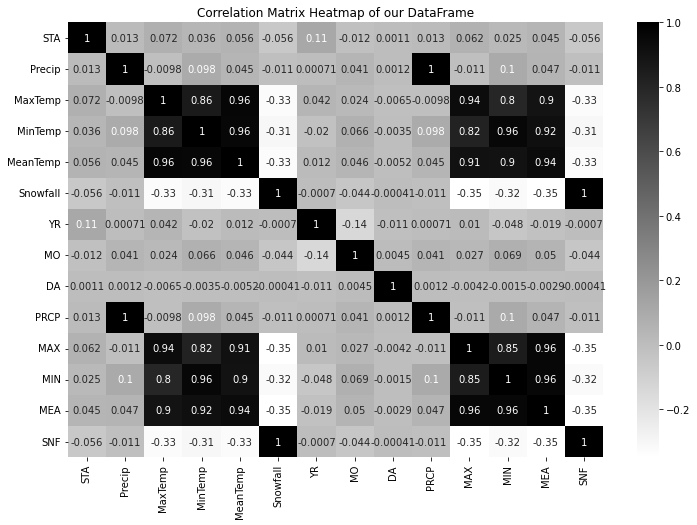

In [36]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='binary')
plt.title('Correlation Matrix Heatmap of our DataFrame')
plt.show()

In [37]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype('bool'))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("The columns that has correlation higher than .90 are : {}".format(to_drop))

The columns that has correlation higher than .90 are : ['MeanTemp', 'PRCP', 'MIN', 'MEA', 'SNF']


In [38]:
#Lets also remove the DATE column from our data
to_drop.append('Date')
df.drop(columns=to_drop, inplace=True)

Now lets move to ML model and fit the data for predictions........

In [39]:
df.columns

Index(['STA', 'Precip', 'MaxTemp', 'MinTemp', 'Snowfall', 'YR', 'MO', 'DA',
       'MAX'],
      dtype='object')

In [40]:
Y = df['MaxTemp']
X = df.drop(columns=['MaxTemp'])

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.25 , random_state=21)

In [44]:
from sklearn.linear_model import LinearRegression

regmodel = LinearRegression()

regmodel.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = regmodel.predict(X_test)

In [46]:
df2 = pd.DataFrame({'Actual':y_test.values.flatten() , 'Predicted':y_pred.flatten()})
df2

,Actual,Predicted
0,40.000000,39.680509
1,31.111111,30.426170
2,31.666667,31.554172
3,32.777778,33.261166
4,18.888889,18.779953
...,...,...
74737,27.222222,27.864869
74738,20.555556,19.519012
74739,28.888889,30.786277
74740,37.777778,34.635087


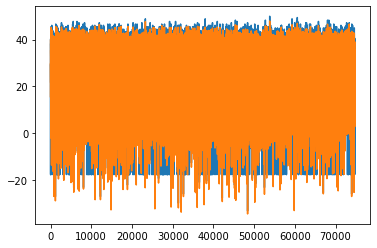

In [47]:
plt.plot(df2['Actual'])
plt.plot(df2['Predicted'])
plt.show()

In [48]:
df2[df2['Predicted'] < 0]

,Actual,Predicted
65,0.555556,-2.071306
240,-10.555556,-13.747117
280,-8.333333,-10.030872
286,-2.222222,-3.208099
292,-10.000000,-12.333627
...,...,...
74308,-3.333333,-3.953147
74355,-3.333333,-5.364100
74426,-18.888889,-19.529961
74451,-4.444444,-11.823817


In [50]:
regmodel.score(X_test,y_test)

0.9064831721294325

S0, Here we see that, our model accuracy is 90%. And that is a good accuracy.

##### With Regularization

In [51]:
from sklearn.linear_model import Ridge, Lasso

rg = Ridge()
ls = Lasso()
rg.fit(X_train, y_train)
ls.fit(X_train, y_train)

Lasso()

In [52]:
rg.score(X_test, y_test), ls.score(X_test, y_test)

(0.9064831867324205, 0.9047132349620899)

Now we can see that, applying the simple(default) regularization doesn't improve our score. Or we can say that using regularization is not very required here.